<a href="https://colab.research.google.com/github/hobbit0701/hobbit/blob/main/EX03_05_%E5%8F%B0%E7%81%A3%E8%82%A1%E7%A5%A8%E5%B8%82%E5%A0%B4%E5%80%8B%E8%82%A1%E6%AF%8F%E6%97%A5%E6%88%90%E4%BA%A4%E8%B3%87%E8%A8%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download


--2025-05-23 05:31:36--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 64.233.188.113, 64.233.188.138, 64.233.188.102, ...
Connecting to drive.google.com (drive.google.com)|64.233.188.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-05-23 05:31:36--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.157.132, 2404:6800:4008:c13::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.157.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘taipei_sans_tc_beta.ttf’

taipei_sans_tc_beta 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2025-05-23 05:31:43 

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
# 設定中文字型及負號正確顯示
plt.rcParams['font.sans-serif'] = 'Taipei Sans TC Beta'
plt.rcParams["axes.unicode_minus"] = False

In [ ]:
import pandas as pd

def get_stock_data(date,stock_no):
  url = f'https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date={date}&stockNo={stock_no}&response=html'
  df = pd.read_html(url, header=1)[0]
  return df


date_range = pd.date_range(start='20240501', end='20250501',freq='MS')
date_list = date_range.strftime('%Y%m%d').to_list()

df = pd.DataFrame()
for date in date_list:
  df = pd.concat([df,get_stock_data(date, '0050')], ignore_index=True)

df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,113/05/02,6666498,1042279767,157.35,157.35,156.00,156.15,-2.1,12625
1,113/05/03,5935465,936184397,158.55,158.65,156.45,156.95,0.8,6876
2,113/05/06,9032607,1441651437,159.00,160.15,159.00,159.20,2.25,12931
3,113/05/07,6699483,1072604883,160.25,160.55,159.50,160.10,0.9,9146
4,113/05/08,6345930,1017586029,160.00,160.80,159.65,160.70,0.6,7563
...,...,...,...,...,...,...,...,...,...
251,114/05/16,10104457,1846369717,182.25,183.20,181.70,183.00,0.5,16289
252,114/05/19,10637473,1929029854,182.65,182.65,180.35,180.45,-2.55,32608
253,114/05/20,5829657,1057784486,181.85,182.40,180.50,180.80,0.35,15097
254,114/05/21,14373334,2627429657,180.90,183.85,180.90,183.60,2.8,20351


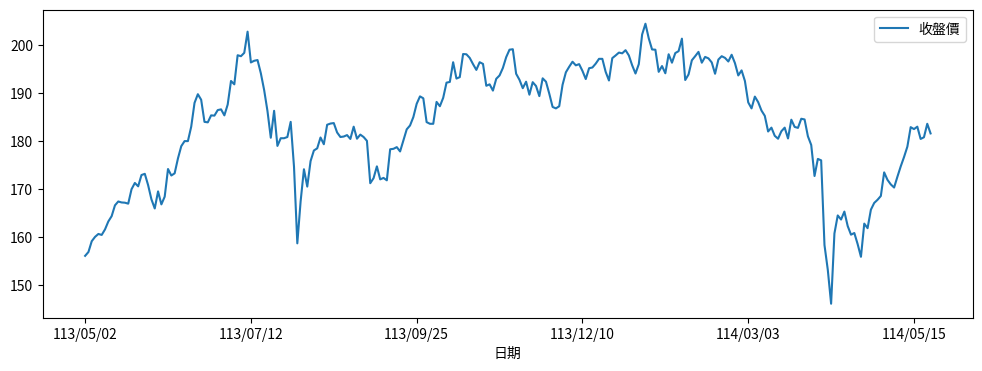

In [ ]:
df.plot(kind='line',x='日期',y='收盤價',figsize=(12,4))
plt.show()

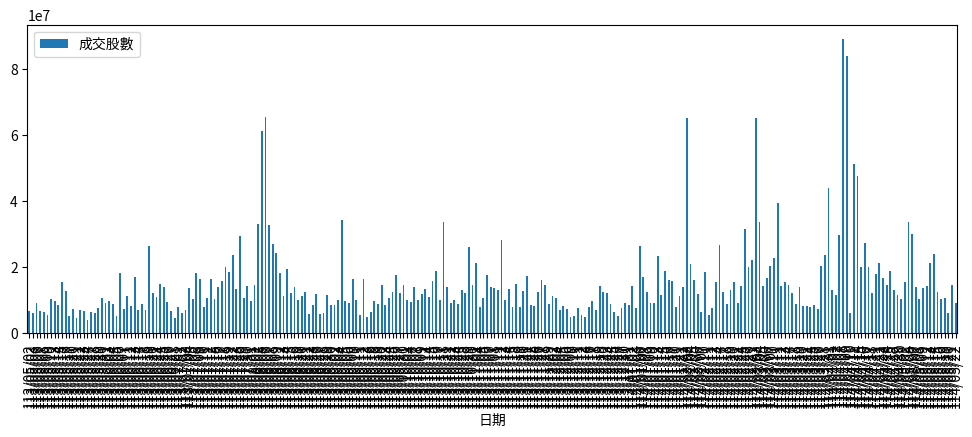

In [ ]:
df.plot(kind='bar',x='日期',y='成交股數',figsize=(12,4))
plt.show()

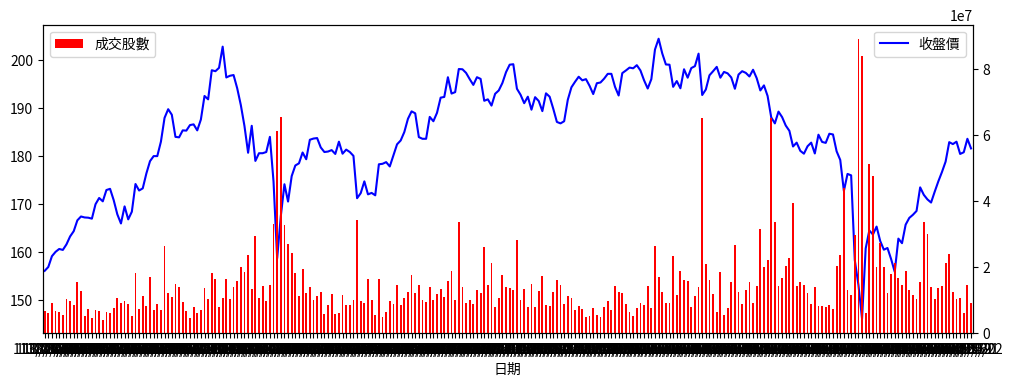

In [ ]:
fig,axl = plt.subplots(figsize=(12,4))
df.plot(kind='line',x='日期',y='收盤價',ax=axl,color='blue')

ax2= axl.twinx()
df.plot(kind='bar',x='日期',y='成交股數',ax=ax2,color='red')
plt.show()

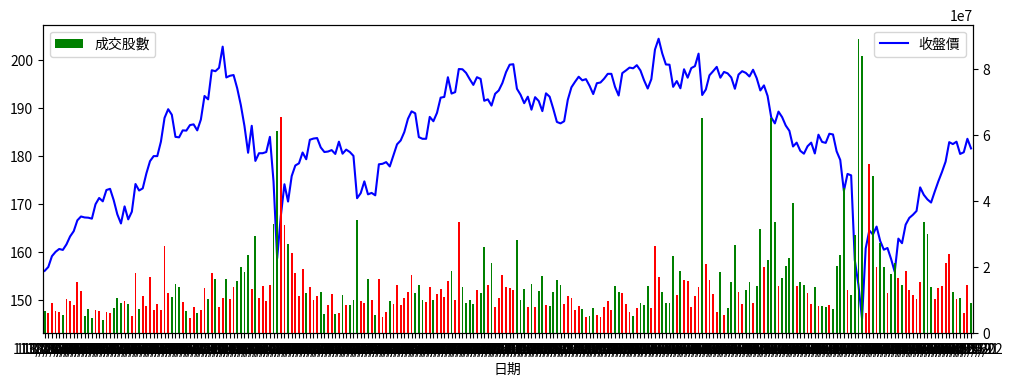

In [ ]:
df['漲跌價差']=pd.to_numeric(df['漲跌價差'],errors = 'coerce')
df['Color']=df['漲跌價差'].apply(lambda x:'green'if x<0 else 'red')

fig,axl = plt.subplots(figsize=(12,4))
df.plot(kind='line',x='日期',y='收盤價',ax=axl,color='blue')

ax2= axl.twinx()
df.plot(kind='bar',x='日期',y='成交股數',ax=ax2,color=df['Color'])
plt.show()
